In [10]:
#for N identical bosons
#this program computes the fraction of particles in the HO ground state and the chemical potential as a function of temperature
#this program does 2D HO by setting the multiplicity to Omega_n = n+1
#the temperature is in units of hbar omega/k_Boltz
#the code uses an iterative method for finding the chemical potential at each T
#the code guesses the chemical potential at the smallest T as the first guess for the smallest T
#for all other T it uses the previous chemical potential as the first guess

#numpy allows for most basic math, including complex numbers
import numpy as np
#pyplot is the 'default' choice for plotting in python
import matplotlib.pyplot as plt

#set the number of Bosons
npart=20000
pi = 2.0*np.asin(1.0)
#calculate the continuum estimate of the critical temperature
tempc = np.sqrt((npart*6.0))/pi

#set the number of temperatures
ntemp = 200
#set the final temperature (below are guesses for reasonable plot regions
tempfin = 1.10*tempc
#set the scaled temperature and the temperature steps
dtemp = tempfin/ntemp

#set arrays for the functions plotted
temp = np.empty(ntemp+1)
fracgrnd = np.empty(ntemp+1)
fracgrnde = np.empty(ntemp+1)
chempot = np.empty(ntemp+1)

#set guess for chemical potential at temp = dtemp
chem = -dtemp/npart

# fill the arrays to be plotted
#the temp=0 case is simple
temp[0] = 0.0
fracgrnd[0] = 1.0
fracgrnde[0] = 1.0
chempot[0] = 0.0
nt = 1
#I used the next line to check that the iterative method worked
#while nt < 5:
while nt < ntemp+1:
    temp[nt] = nt*dtemp
    itermu = 0
    testmax = npart*1.e-6
    test = testmax*1.1
    while test > testmax:
        #sum0 will contain the sum in the grand partition function
        #sum1 is the derivative of the grand partition function with respect to mu
        sum0=0.0
        sum1=0.0
        beta = 1.0/temp[nt]
        #nfin is the estimate of how many terms to keep in the sume of the grand partition function
        nfin= 2 + 30*temp[nt]
        n=0
        #dum = exp(beta (n-mu)) instead of calculating each term from the exponential, I just multiply by exp(beta)
        dumit=np.exp(beta)
        dum=np.exp(beta*(n-chem))
        while n < nfin:
            #dum=np.exp(beta*(n-chem))
            omega=(n+1.0)
            sum0 += omega/(dum-1.0)
            sum1 += omega*beta*dum/((dum-1.0)*(dum-1.0))
            dum*=dumit
            n+=1
        #calculate the new value of the chemical potential in the iteration
        chem -= (sum0-npart)/sum1
        test=np.abs(sum0-npart)
        #print(nt,itermu,'{:.3e}'.format(chem),'{:.3e}'.format(sum0-npart))
        itermu+=1
    fracgrnd[nt]=1.0/(np.exp(-beta*chem)-1.0)/npart
    fracgrnde[nt] = 0.0
    if(temp[nt] < tempc):
        fracgrnde[nt]=1.0-(temp[nt]/tempc)*(temp[nt]/tempc)
    #print(nt,itermu,'{:.3e}'.format(chem),'{:.3e}'.format(sum0-npart))
    chempot[nt]=chem
    nt += 1
    


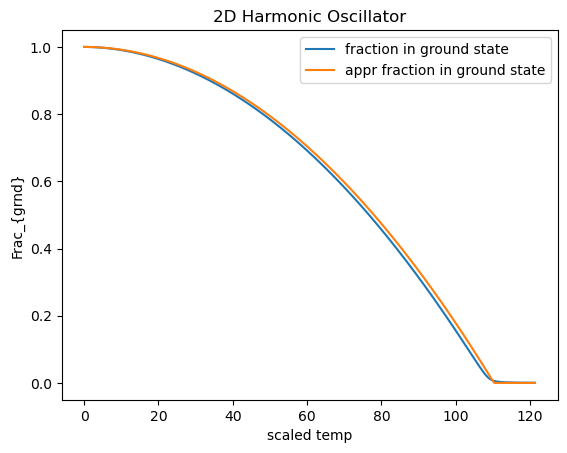

In [11]:
plt.plot(temp,fracgrnd,label='fraction in ground state')
plt.plot(temp,fracgrnde,label='appr fraction in ground state')
plt.legend()
plt.title('2D Harmonic Oscillator')
plt.xlabel('scaled temp')
plt.ylabel('Frac_{grnd}')
plt.show()

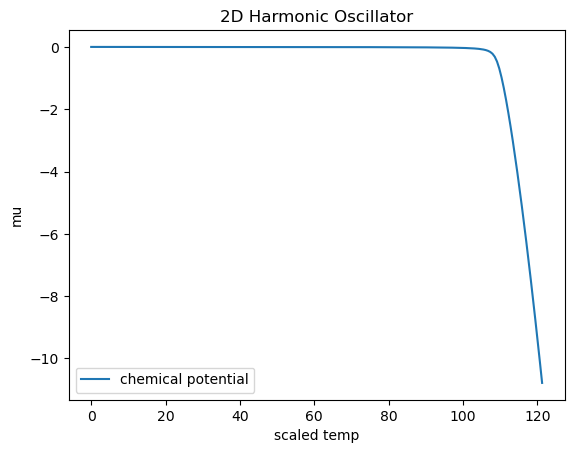

In [12]:
plt.plot(temp,chempot,label='chemical potential')
plt.legend()
plt.title('2D Harmonic Oscillator')
plt.xlabel('scaled temp')
plt.ylabel('mu')
plt.show()